<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/2_svm/11_seminario_nov_15_2023/11_seminario_ml_sat_dengue_nov_15_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo](https://www.youtube.com/watch?v=-sNbp4PIuV4)

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/calculo_diferencial_2023-09-22%20at%2012.12.55%20PM.jpeg?raw=true'>

Maestros Puerto libertador:  

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/maestros_puerto_libertador_2023-09-25.jpeg?raw=true'>

# Los jóvenes investigadores  

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/4_images/janis_joseph_marco.jpg?raw=true'>

# La motivación para aprender lenguajes como R y Python

<img src = ''>

# QR de Antioquia mira su cielo

Este es un aporte del Joven Investigador Yeifry Uribe de la Licenciatura en matemáticas.

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/qr_amsc.jpeg?raw=true'>

# Seminario 11 en Machine learning para SAT-dengue del Miércoles 15 de Noviembre 2023. 4 PM. 

## Objetivo



* Dar a conocer el [archivo agroclimático de Fedearroz](https://clima.fedearroz.com.co/)


* [Archivo meteorológico de Puerto Libertador](https://www.meteoblue.com/es/tiempo/historyclimate/weatherarchive/puerto-libertador_colombia_11900983)


* Obtención de los datos de las estaciones del proyecto Antioquia mira su cielo [obtenga los datos de Antioquia Mira su Cielo Aquí(AMSC)](http://54.146.188.73:8501/)

* [Datos Facom](http://44.201.207.176/pagina2/estructura.html)

* Revisión de los datos de pluviometría del la estación UdeA Caucasia



* Visualización de los datos de AMSC con plotly


* Comparación de las fronteras de decisión asociadas a los modelos de regresión logística y Maquina de Soporte vectorial. 



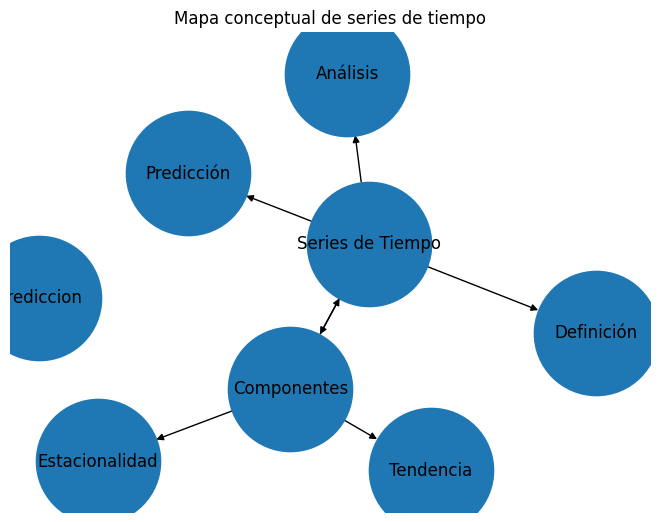

In [2]:
# Mapa conceptual
import matplotlib.pyplot as plt 
import networkx as nx 

# Crear un objeto de grafo dirigido

G = nx.DiGraph() 

# Paso 3: Agregar nodos al grafo para representar conceptos clave de las series de tiempo

lista_de_conceptos = ["Series de Tiempo", 'prediccion']

G.add_nodes_from(lista_de_conceptos)



#Paso 4: Agregar bordes que conecten los nodos para mostrar relaciones

G.add_edge("Series de Tiempo", "Definición")
G.add_edge("Series de Tiempo", "Componentes")
G.add_edge("Componentes", "Tendencia")
G.add_edge("Componentes", "Estacionalidad")
G.add_edge("Componentes", "Series de Tiempo")
G.add_edge("Series de Tiempo", "Análisis")
G.add_edge("Series de Tiempo", "Predicción")


# Dibujar el mapa conceptual utilizando networkx y matplotlib

pos = nx.spring_layout(G, seed = 48) # con ubicaciones aleatorias fijadas
labels = {node:node for node in G.nodes()}

nx.draw(G, pos, with_labels = True, node_size = 8000)

plt.title('Mapa conceptual de series de tiempo')
plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/mapa_conceptuual_series_de_tiempo.png')
plt.show()


## [Video para el mapa conceptual del seminario]()

## Obtención y visualización de los datos de AMSC

1. Ir a la página del proyecto [AMSC]()
2. Seleccionar la variable meteorológica que quiere. 
3. Seleccionar el invervalo de tiempo 
4. Dar el correo donde quiere que le lleguen los datos como archivo .csv

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/caucasia_yarumal_julio_a_noviembre_2023.csv'

df = pd.read_csv(url)

In [ ]:
df.tail() 

In [ ]:
df.keys()


In [ ]:
df= df[['fecha', 'nombre_completo', 'temperatura',
       'presion', 'humedad_relativa', 'precipitacion']]

In [ ]:
df.index = df.fecha

In [ ]:
df= df[['temperatura', 'presion', 'humedad_relativa', 'precipitacion', 'nombre_completo']]

In [ ]:
df

In [14]:
import matplotlib.pyplot as plt
plt.title('Temperatura Caucasia')
plt.plot(df.temperatura[df.nombre_completo=='UdeA Caucasia'])

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/temperatura_caucasia.jpg')




# Visualización con plotly

In [ ]:
import plotly.express as px
import pandas as pd

# Lee los datos del archivo CSV
archivo_csv = "temperatura_caucasia.csv"
df = pd.read_csv(archivo_csv)

df

In [ ]:
import plotly.express as px
import pandas as pd

# Lee los datos del archivo CSV
archivo_csv = "temperatura_caucasia.csv"
df = pd.read_csv(archivo_csv)

# Asegúrate de que la columna de fecha esté en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crea una gráfica de líneas interactiva con Plotly Express
fig = px.line(df, x='fecha', y='temperatura', title='Serie de Tiempo de Temperatura')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura (°C)')

# Personaliza el diseño de la gráfica si es necesario
# fig.update_layout(
#     xaxis=dict(
#         showline=True,
#         showgrid=False
#     ),
#     yaxis=dict(
#         showline=True,
#         showgrid=False
#     )
# )

# Muestra la gráfica
fig.show()


## [Video de apoyo graficación con plotly](https://www.youtube.com/watch?v=pTjH21x2pSY)

## Time Series según Wes

## 11.2 Time Series Basics


A basic kind of time series object in pandas is a Series indexed by timestamps, which
is often represented external to pandas as Python strings or datetime objects:

Un tipo básico de objeto de serie temporal en pandas es una serie indexada por marcas de tiempo, que a menudo se representa externamente a pandas como cadenas de Python u objetos de fecha y hora:

In [ ]:
import numpy as np 
import pandas as pd 
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts


Under the hood, these datetime objects have been put in a DatetimeIndex:

En el fondo, estos objetos de fecha y hora se han colocado en un `DatetimeIndex`:

In [ ]:
ts.index 

Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:

Al igual que otras series, las operaciones aritméticas entre diferentes series temporales de índices se alinean automáticamente en las fechas:  


In [ ]:
ts + ts[::2] # sumar la serie con la serie formada por las fechas saltando de 2 en 2. 

Recall that `ts[::2]` selects every second element in ts.

pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution:

pandas almacena marcas de tiempo utilizando el tipo de datos `datetime64` de NumPy con una resolución de nanosegundos:

In [ ]:
ts.index.dtype

Scalar values from a DatetimeIndex are pandas Timestamp objects:

In [ ]:
stamp = ts.index[0]
stamp 

A Timestamp can be substituted anywhere you would use a datetime object. 

Una marca de tiempo se puede sustituir en cualquier lugar donde usaría un objeto de fecha y hora.

Additionally, it can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations. More on both of these things later.


# Indexing, Selection, Subsetting


Time series behaves like any other pandas.Series when you are indexing and selecting data based on label:

In [ ]:
stamp = ts.index[2]
stamp 

In [ ]:
ts[stamp]

As a convenience, you can also pass a string that is interpretable as a date:

In [ ]:
ts['1/10/2011']


In [ ]:

ts['20110110']


For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [ ]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

In [ ]:
longer_ts['2001']

Here, the string '2001' is interpreted as a year and selects that time period. This also works if you specify the month:

In [ ]:
longer_ts['2001-05']

Slicing with datetime objects works as well:

In [ ]:
ts[datetime(2011, 1, 7):]

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [ ]:
ts 

In [ ]:
ts['1/6/2011':'1/11/2011']

# Vocubulary  

* support: soporte
* versatile: 
* capable:  
* performing: 
* 

# Máquinas de soporte vectorial según Geron


# Chapter 5. Support Vector Machines (Página 219)

### [Video de apoyo]()


A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.   

Una máquina de vectores de soporte (SVM) es un modelo de aprendizaje automático potente y versátil, capaz de realizar clasificación, regresión e incluso detección de valores atípicos lineales o no lineales.

It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox.   

Es uno de los modelos más populares de Machine Learning y cualquier persona interesada en Machine Learning debería tenerlo en su caja de herramientas.

SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

Las SVM son particularmente adecuadas para la clasificación de conjuntos de datos complejos de tamaño pequeño o mediano.

This chapter will explain the core concepts of SVMs, how to use them, and how they work.  

Este capítulo explicará los conceptos básicos de las SVM, cómo usarlas y cómo funcionan.  


# Linear SVM Classification


The fundamental idea behind SVMs is best explained with some pictures. 

La idea fundamental detrás de las SVM se explica mejor con algunas imágenes.

Figure 5-1 shows part of the iris dataset that was introduced at the end of Chapter 4. 

La Figura 5-1 muestra parte del conjunto de datos del iris que se presentó al final del Capítulo 4.

In [ ]:
# extra code – this cell generates and saves Figure 5–1
# https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb

#importación de las librerías 

from sklearn import datasets # obtención de datos

import matplotlib.pyplot as plt  # visualización gráfica en diagramas bidimensionales
import numpy as np # Visualización tabular y manipulación de datos



from sklearn.svm import SVC


iris = datasets.load_iris(as_frame=True) # obtiene los datos como estructuta de Bunch y los guarda en la variable iris


# Las florez de iris 

<img src = 'https://raw.githubusercontent.com/JoePortilla/IrisDataset-EDA/main/img/iris_flowers.png'>

# [Historia del dataset de florez de iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)



In [ ]:
type(iris)  # para ver la estructura de los datos (Buch)

In [ ]:
iris.keys()  # obtención de las llaves para obtención de los datos

In [ ]:
dic = {'nombre':'marco'}

dic['nombre'] 

In [ ]:
iris.data  # acceso a las variables predictoras en forma de DataFrame


In [ ]:
iris.target.value_counts()  # la freciencia de cada uno de los tipos de florez de iris. 

In [ ]:
type(iris) 

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
X 

In [ ]:
y = iris.target
y

# Visualización gráfica del dataset de florez de iris en cuanto a los parámetros de longitud y ancho de pétalo



La clase positiva es ser setosa 

y la clase negativa es ser versicolor. 




In [ ]:
y = iris.target 
X = iris.data 
setosa_or_versicolor = (y == 0) | (y == 1)
setosa_or_versicolor.value_counts() 

In [ ]:

# Tomar del dataset solo las 100 instancias sobre los datos de setosa y versicolor. 

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor] # así la clase positiva a a ser el ser setosa o virgínica. 


In [ ]:
X.shape, y.shape

In [ ]:
False | False 

In [ ]:
x = 5  # Representación binaria: 0101
y = 3  # Representación binaria: 0011
resultado = x | y  # Operación OR a nivel de bits
print(resultado)  # Output: 7 (Representación binaria: 0111)


# Aprendamos sobre la diferencia entre los operadores or y | de python

En Python, `or` y `|` son dos operadores diferentes que se utilizan en contextos distintos.

1. **Operador `or`:**
   - `or` es un operador lógico que se utiliza para combinar dos expresiones booleanas. Devuelve `True` si al menos una de las expresiones es verdadera y `False` si ambas son falsas.
   - Ejemplo:
     ```python
     x = True
     y = False
     resultado = x or y
     print(resultado)  # Output: True
     ```

2. **Operador `|`:**
   - `|` es un operador de bits (también conocido como operador OR a nivel de bits) que se utiliza para realizar operaciones de bits a nivel de bits en enteros.
   - Ejemplo:
     ```python
     x = 5  # Representación binaria: 0101
     y = 3  # Representación binaria: 0011
     resultado = x | y  # Operación OR a nivel de bits
     print(resultado)  # Output: 7 (Representación binaria: 0111)
     ```

En resumen, `or` es un operador lógico que se utiliza para evaluar expresiones booleanas, mientras que `|` es un operador a nivel de bits que se utiliza para realizar operaciones de bits en números enteros. Es importante usar el operador correcto según el contexto de tu código para evitar errores y obtener los resultados esperados.

Tomado de ChatGPT. 



In [ ]:

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10.0)
svm_clf.fit(X, y)


# Visualización de la clasificación que ha logrado este modelo

In [ ]:

# Bad models
x0 = np.linspace(0, 5.5, 200)   # Dominio común para todas las fronteras de decisión
pred_1 = 5 * x0 - 20            # una recta inventada de pendiente 5 e intersecto en el origen b = -20
pred_2 = x0 - 1.8               # una recta inventada de pendiente 1 e intersecto en el origen b = -1.8
pred_3 = 0.1 * x0 + 0.5         # una recta inventada de pendiente 0.1 e intersecto en el origen b = 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)  # frontera de decisión color magenta 
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.savefig("/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/clasificacion_alto_margen.jpg")
plt.show()


The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. 

Las dos clases claramente se pueden separar fácilmente con una línea recta (son linealmente separables). El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales.

The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. 

El modelo cuyo límite de decisión está representado por la línea discontinua es tan malo que ni siquiera separa las clases adecuadamente.

The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances.   

Los otros dos modelos funcionan perfectamente en este conjunto de entrenamiento, pero sus límites de decisión se acercan tanto a las instancias que estos modelos probablemente no funcionarán tan bien en instancias nuevas.

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible.   

Por el contrario, la línea continua en el gráfico de la derecha representa el límite de decisión de un clasificador SVM; esta línea no sólo separa las dos clases sino que también se mantiene lo más alejada posible de las instancias de entrenamiento más cercanas posible.



You can think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.  

Puede pensar que un clasificador SVM se ajusta a la calle más ancha posible (representada por líneas discontinuas paralelas) entre las clases. A esto se le llama clasificación de gran margen.


# Linear SVM Classification



The book starts with a few figures, before the first code example, so the next three cells generate and save these figures. You can skip them if you want.  

El libro comienza con algunas cifras, antes del primer ejemplo de código, por lo que las siguientes tres celdas generan y guardan estas cifras. Puedes omitirlos si quieres.


The fundamental idea behind SVMs is best explained with some pictures. Figure 5-1 shows
part of the iris dataset that was introduced at the end of Chapter 4.   

La idea fundamental detrás de las SVM se explica mejor con algunas imágenes. La Figura 5-1 muestra parte del conjunto de datos del iris que se presentó al final del Capítulo 4.

The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. 

Las dos clases claramente se pueden separar fácilmente con una línea recta (son linealmente separables). El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales.

The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly.   

El modelo cuyo límite de decisión está representado por la línea discontinua es tan malo que ni siquiera separa las clases adecuadamente.

The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances. 

In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible.   

Por el contrario, la línea continua en el gráfico de la derecha representa el límite de decisión de un clasificador SVM; esta línea no sólo separa las dos clases sino que también se mantiene lo más alejada posible de las instancias de entrenamiento más cercanas posible.

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.  

Puede pensar que un clasificador SVM se ajusta a la calle más ancha posible (representada por líneas discontinuas paralelas) entre las clases. A esto se le llama clasificación de gran margen.

In [ ]:

# extra code – this cell generates and saves Figure 5–1
# https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC # configurar el modelo predictor
from sklearn import datasets # para obtener el dataset de florez de iris. 

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=10.0)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.savefig("/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/clasificacion_alto_margen.jpg")
plt.show()



Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street.   

Tenga en cuenta que agregar más instancias de entrenamiento "fuera de la calle" no afectará en absoluto el límite de decisión: está completamente determinado (o "respaldado") por las instancias ubicadas en el borde de la calle.

These instances are called the support vectors (they are circled in Figure 5-1).  

Estos casos se denominan vectores de soporte (están rodeados por un círculo en la Figura 5-1).

# Ahora hagamos la práctica de clasificación binaria de los datos de temperatura y presión de Caucasia y Yarumal, los que pensamos son datos linealmente separables. 



# Configuración de un detector de caucasia como zona geográfica determinada por su `temperatura` y `humedad_relativa`. 

## Obtención de los datos de Caucasia y Yarumal, en cuanto a los parámetros meteorológicos: temperatura y presión

In [ ]:
import pandas as pd 

url = ''

datos_cy = pd.read_csv('caucasia_yarumal_temperatura_presion.csv')

In [ ]:
datos_cy 

In [ ]:
datos_cy.style.hide()

In [ ]:
datos_cy[['fecha', 'temperatura', 'presion', 'nombre_completo',]].style.hide()

In [ ]:
datos_cy

In [ ]:
import matplotlib.pyplot as plt # hacer gráficos de dispersión
import numpy as np # organizar los datos en forma de vectores y matrices.


datos_caucasia = datos_cy.loc[datos_cy['nombre_completo']=='UdeA Caucasia']
datos_yarumal = datos_cy.loc[datos_cy['nombre_completo']=='UdeA Yarumal']
plt.scatter(datos_caucasia.temperatura, datos_caucasia.presion, label = 'Caucasia')
plt.scatter(datos_yarumal.temperatura, datos_yarumal.presion, label = 'Yarumal')
plt.xlabel('temperatura')
plt.ylabel('presión')
plt.grid() 

plt.legend() 





In [ ]:
X = datos_cy[['temperatura', 'presion']]
X 

In [ ]:
X = X.values  # Utilización del atributo values para convertir el dataframe en un nb.array de numpy. 
X  # se pierde los nombres de las columnas.. 

In [ ]:
# determinación de la variable objetivo

# El clasificador debe detectar cuando los datos de temperatura y presión corresponden a Caucasia

y = datos_cy.nombre_completo
y 

# Referencias

* Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc.".](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694149999&Signature=MH1uVxkUnFgwepQUeb-3OdFgQWj0vmtzC4ra~TZ-xyCstLSCg7uaNeDi4yrXghoJ6UEMCGOJkx2s13vayVVP-IzF8I91v6TeW0ZUeIejbWlrkHxtT01V-fJ6q7C~9buozUwVr~o2BY3llLH5rZVlZF31pPefEm3ejjlW8pO~prbQ8VVfyfXs4HzSIQJ~nbTCZU8LfqYwU3yMLV7IH4TQN9eGd8GZuqHjznUJZU995AwYqQqzl5-Xtoz93-S1Pn2UWuS8SsXmFt1ysr~-M7-6lVQw~E9~MFbdCIQRfp~fRtVtHDfB-mEXNEQ1CX518xUB0xT3JtfZdsGArib9UMwOqg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

<img src = 'https://wesmckinney.com/images/wes-2017-01-12-small.png' width = 200>

* [Documentación de la función nx.spring_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)

* [Cuaderno Jupyter sobre Máquinas de soporte vectorial de Geron](https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb)